# Frequency Series Fitting (With Transfer Funtcion Part 2)

We follow the Part 1 and fit the typical LVDT noise with a transfer function.
In Part 1 we have obtained a ZPK model which is technically already a transfer function.
But it's not general enough. In this tutorial, we will obtain a transfer function by local optimization and
we will utilize the ZPK model as the initial point.
We divide the tutorial into two parts, we fist fit the LVDT noise with a zero-pole-gain (ZPK) model.
A zero-pole-gain model is not the most general model but it is useful as a stepping stone before a
general fractional polynomial model. With the ZPK model, we can use global optimization as the upper limits
of the zeros and poles are well defined by the frequency axis of the measurement. 
For now, the tool we present here is only capable of fitting transfer functions with equal number of poles and zeros so we only need to specify the order of the transfer function. Although we said it's
required to specify the system order, the final product will not necessarily be the same order as
we will present a mechanism for order reduction in Part 2 when we introduce the fractional polynomial model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kontrol
import kontrol.core.math
import kontrol.frequency_series.noise_models


np.random.seed(123)

f = np.linspace(1e-2, 1e2, 1000)
lvdt_noise = kontrol.frequency_series.noise_models.lvdt_noise(f)
noisy_data_db = np.random.uniform(-1, 1, 1000)  # Some random noise between -1 and 1 dB.
lvdt_noise = lvdt_noise * 10**(noisy_data_db/20)

# We follow the Frequency Series Fitting Tutorial (With Empirical Model to fit the data.)
fs = kontrol.FrequencySeries(f=f, x=lvdt_noise)
model = kontrol.frequency_series.noise_models.lvdt_noise

res_empirical = fs.fit_empirical(model=model)
res_zpk = fs.fit_zpk(order=5, padding=True)

In [2]:
res_tf = fs.fit_tf(optimizer_kwargs={"options":{"disp":True, "ftol":1e-15, "xtol":1e-6, 'maxiter': None, 'maxfev': 10*10000}})

Optimization terminated successfully.
         Current function value: 0.000062
         Iterations: 366
         Function evaluations: 83765


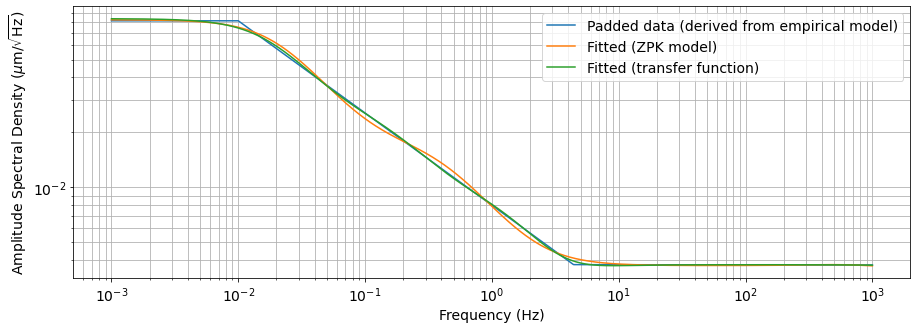

In [3]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,5))
# plt.loglog(f, fs.x, label="Measured")
plt.loglog(fs._f_processed, fs._x_processed, label="Padded data (derived from empirical model)")
plt.loglog(fs.f_zpk, abs(fs.x_zpk), label="Fitted (ZPK model)")
plt.loglog(fs.f_tf, abs(fs.x_tf), label="Fitted (transfer function)")
# plt.loglog(f, abs(x_tf))
plt.ylabel("Amplitude Spectral Density ($\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")
plt.legend(loc=0)
plt.grid(which="both")

In [4]:
fs.tf  # The transfer function

TransferFunction(array([5.86220533e+11, 1.46579891e+17, 6.47327529e+18, 9.95196275e+19,
       2.74392868e+20, 9.21140063e+19]), array([7.16336109e+14, 3.88053233e+19, 1.39830304e+21, 1.03830791e+22,
       1.07018242e+22, 1.10030786e+21]))